# PROBLEM STATEMENT

Given the HR analytics data of employees of a particular MNC. Using the data we need to predict whether a particular employee is promoted or not

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the dataset

train_data=pd.read_csv(r"C:\Users\hp\Downloads\train_LZdllcl.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Basic information

In [3]:
train_data.shape

(54808, 14)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
train_data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [7]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Inference
There are null values in the dataset.

In [8]:
train_data.duplicated().any()

False

### Inference
There are no duplicates in the dataset.

In [9]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
train_data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


### Inference:
* Length of service has positive correlation with age.
* Promotion is positively correlated with previous year rating,KPI's,awards won and average training score.

### Missing value treatment

In [11]:
# checking for unique values and their counts in the column education

train_data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
# Fiiling  using mode value

train_data['education'].fillna(train_data['education'].mode()[0],inplace=True)

In [13]:
# to check the relation of those employees with no previous year rating.

sub_data=train_data[train_data['previous_year_rating'].isnull()]
sub_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [14]:
sub_data['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

### Inference:
Hence we can conclude that those employees who do not have previous year rating are those who have only 1 year of experience.

In [15]:
# Filling missing values by 0

train_data['previous_year_rating'].fillna(0,inplace=True)

## Exploratory Analysis

In [16]:
# To get numerical columns
data1=train_data.drop(['employee_id','department', 'region', 'education', 'gender','recruitment_channel'],axis=1)

<Figure size 864x864 with 0 Axes>

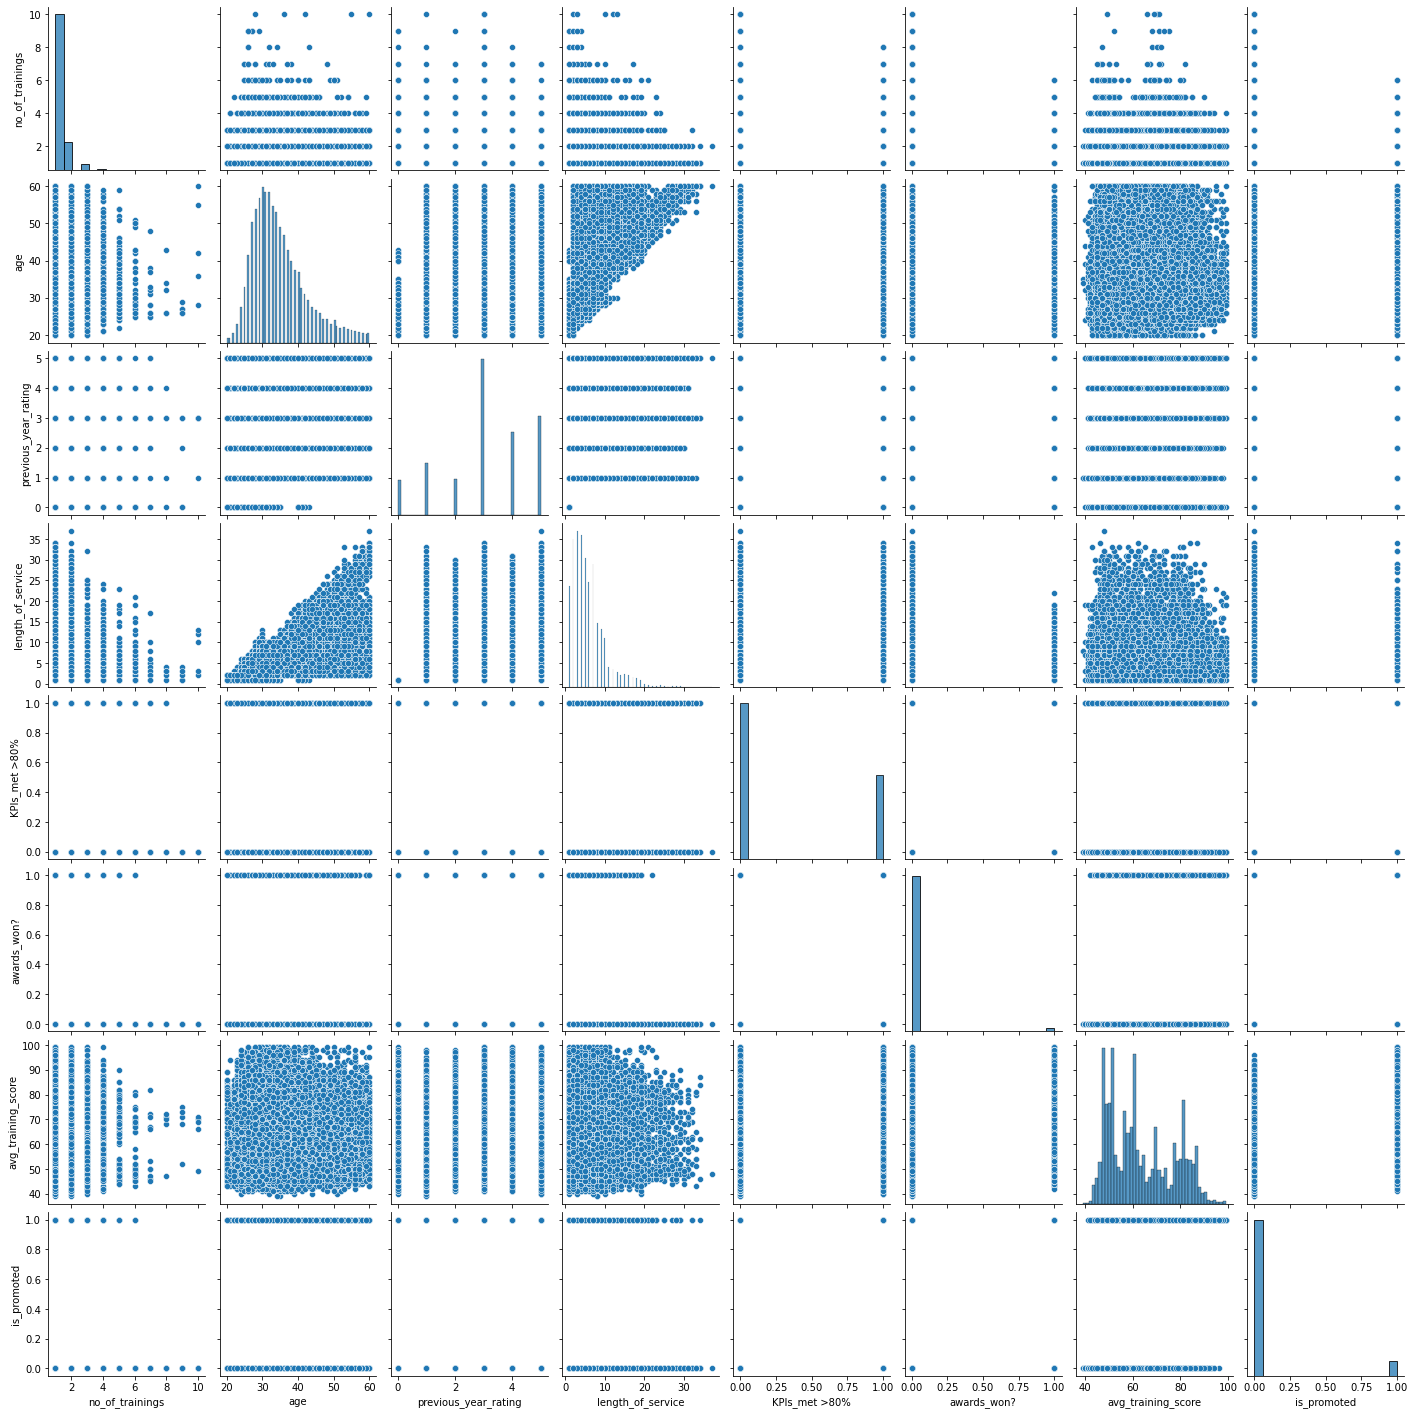

In [17]:
plt.figure(figsize=(12,12))

sns.pairplot(data1)

In [18]:
col=['department', 'region', 'education', 'gender','recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'is_promoted']

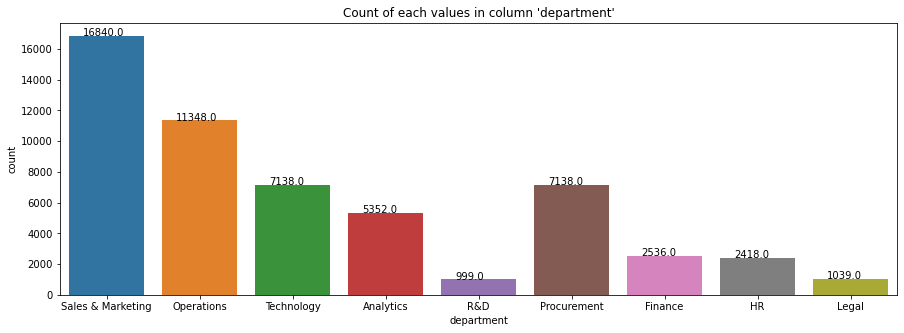

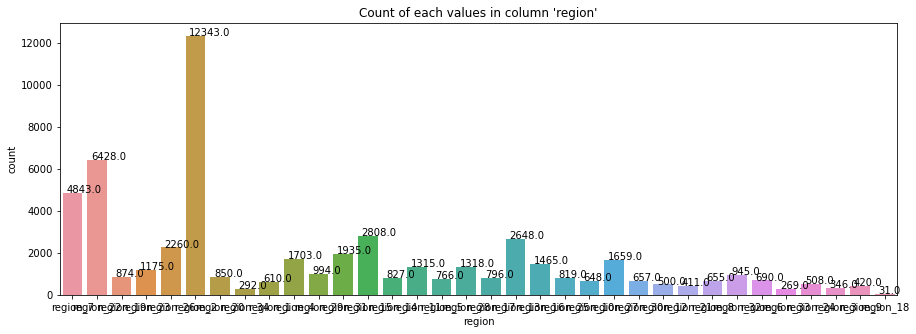

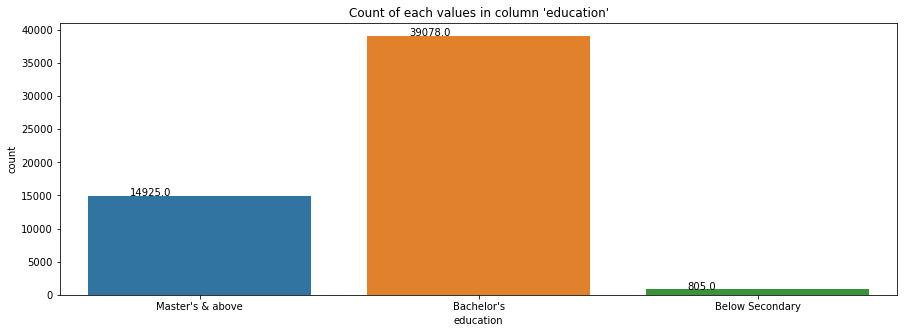

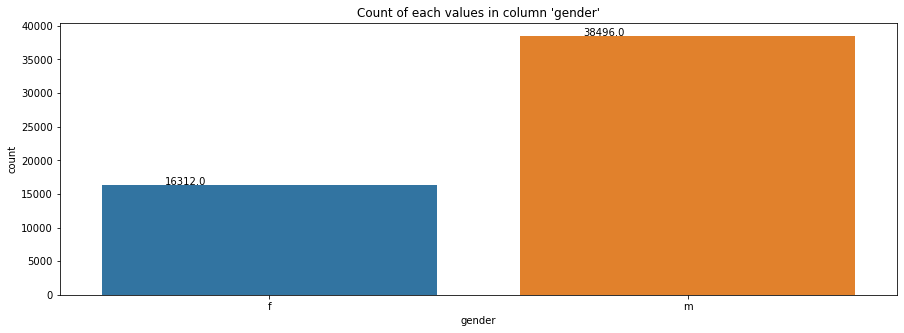

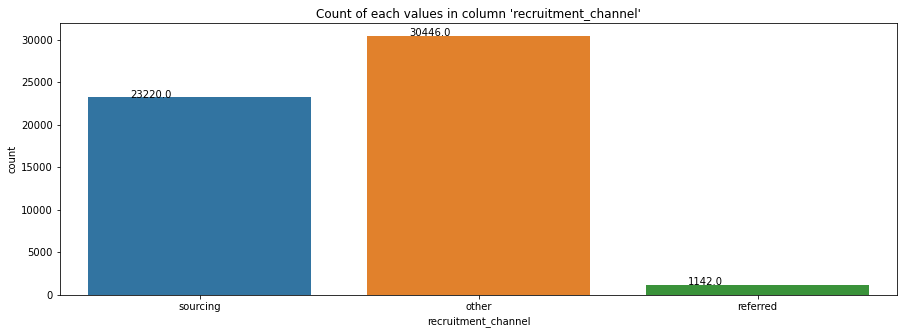

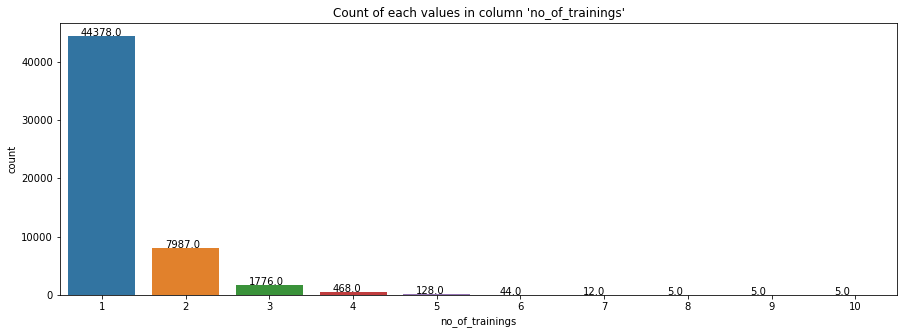

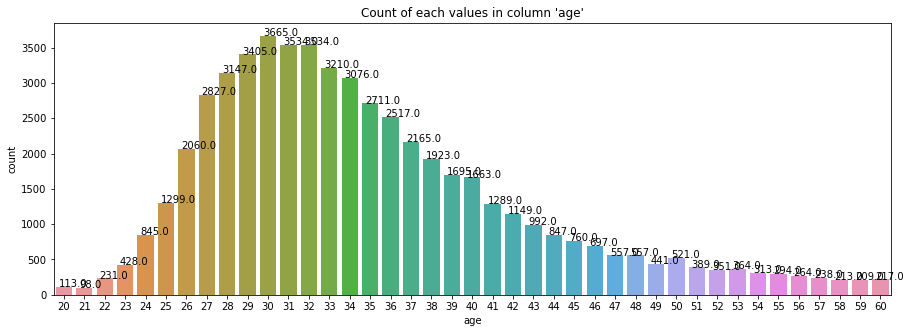

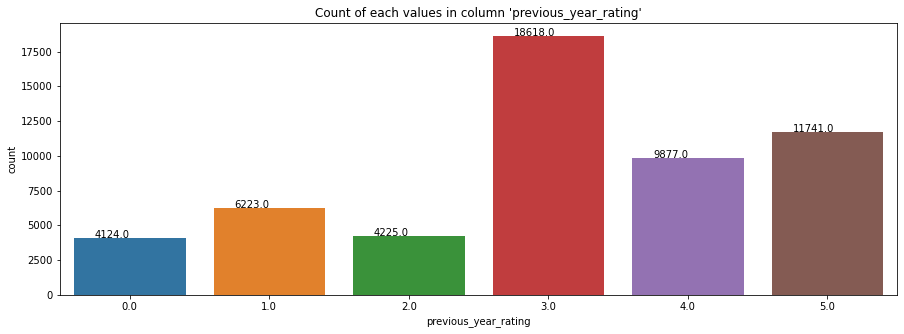

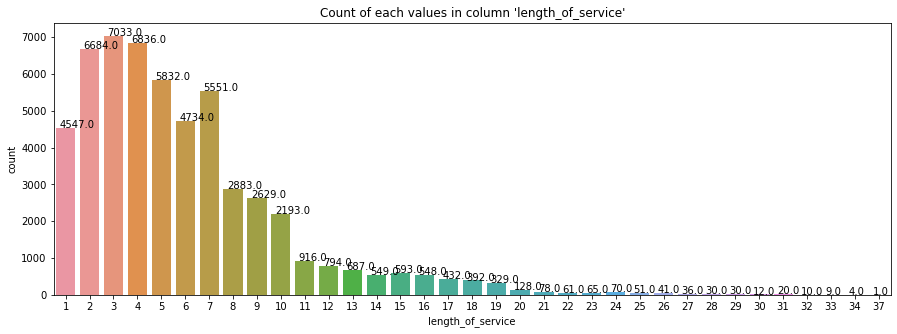

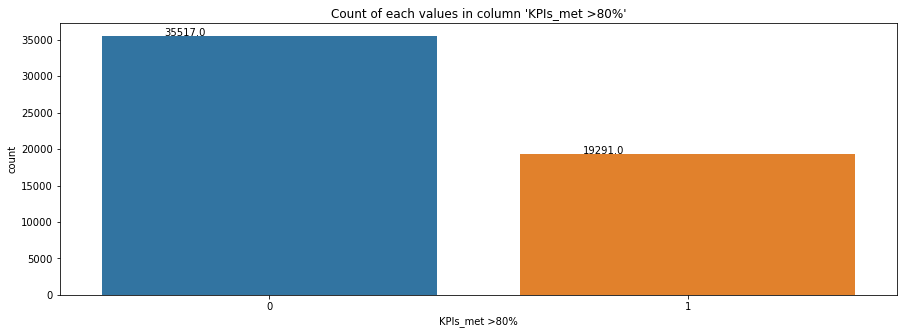

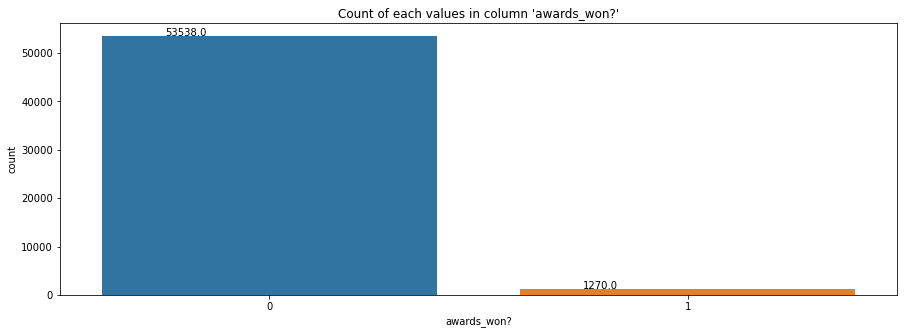

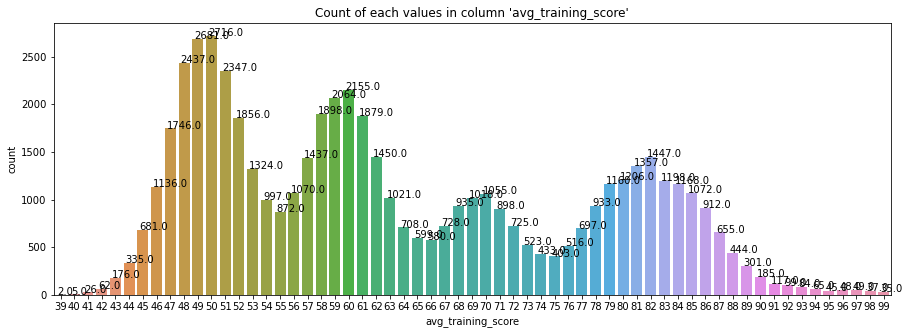

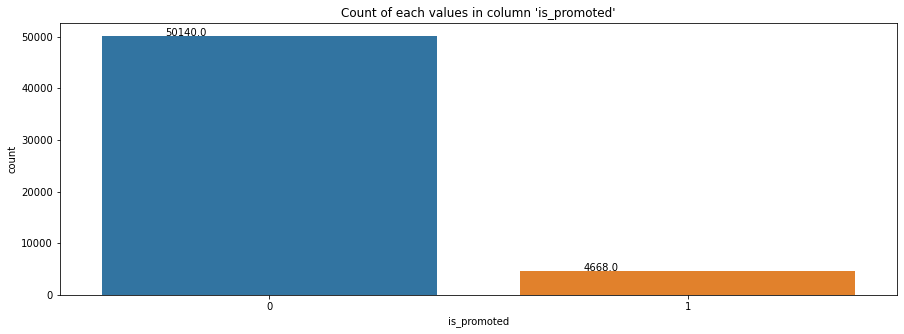

In [19]:
# Count of each values in column
for i in col:
    plt.figure(figsize=(15,5))
    plt.title("Count of each values in column '{}'".format(i))
    plot1=sns.countplot(train_data[i])
    for p in plot1.patches:
        plot1.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.05))
    plt.show()

### Inference:
From the countplot of the feature column 'is_promoted' inference can be made that the dataset is unbalanced.
only 4668 employees are promoted and 50140 of the employees are not promoted.

<AxesSubplot:>

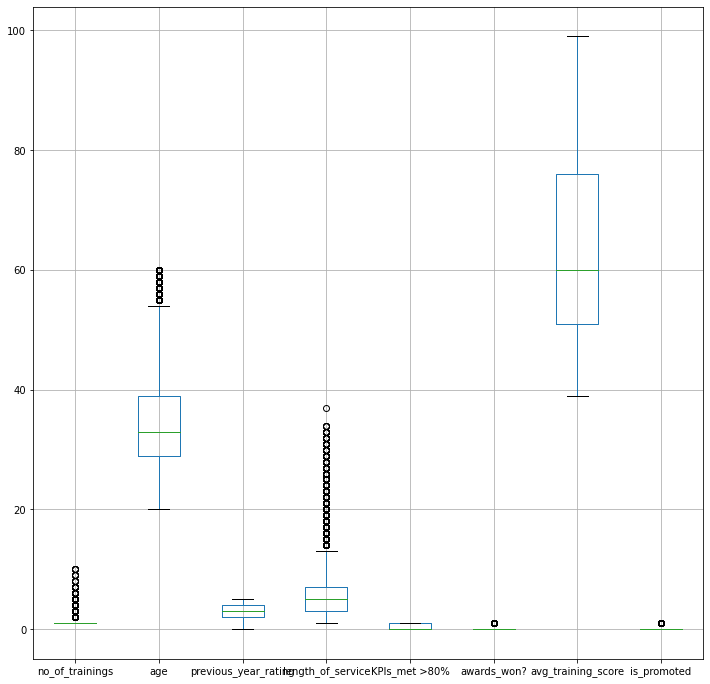

In [20]:
# To check for outliers

plt.figure(figsize=(12,12))

data1.boxplot()

In [21]:
train_data[train_data['is_promoted']==1].max()

employee_id                        78292
department                    Technology
region                          region_9
education               Master's & above
gender                                 m
recruitment_channel             sourcing
no_of_trainings                        6
age                                   60
previous_year_rating                   5
length_of_service                     34
KPIs_met >80%                          1
awards_won?                            1
avg_training_score                    99
is_promoted                            1
dtype: object

### Inference
The number of employees who have been promoted is very less and the data is unbalanced. Among those employees who are promoted ,they have the values of different features in the group of outliers.Hence the outlier observations cannot be removed.Hence outliers are retained.

## MODEL BUILDING

In [22]:
# splitting the training dataset into independent feature and target feature.

# Independent features
x=train_data.drop(['employee_id','region','recruitment_channel','is_promoted'],axis=1)

# target features
y=train_data['is_promoted']

In [23]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x['department']=label.fit_transform(x['department'])
x['gender']=label.fit_transform(x['gender'])
x['education']=label.fit_transform(x['education'])

In [24]:
!pip install imblearn

In [25]:
# Since the data is highly unbalanced oversampling technique is used to balance the data


from imblearn.over_sampling import SMOTE
x_sample,y_sample=SMOTE().fit_resample(x,y.values.ravel())

print(x_sample.shape)
print(y_sample.shape)

(100280, 10)
(100280,)


In [26]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x_sample)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.821376,1.649098,-1.283121,-0.337537,0.071650,1.100348,0.567400,1.072915,-0.160684,-1.230503
1,-0.371418,-0.638642,0.779350,-0.337537,-0.607738,1.100348,-0.409778,-0.932040,-0.160684,-0.471749
2,0.821376,-0.638642,0.779350,-0.337537,-0.064227,-0.255693,0.323105,-0.932040,-0.160684,-1.161525
3,0.821376,-0.638642,0.779350,1.674723,0.615160,-1.611735,1.055988,-0.932040,-0.160684,-1.161525
4,1.218974,-0.638642,0.779350,-0.337537,1.430425,-0.255693,-0.898366,-0.932040,-0.160684,0.424960
...,...,...,...,...,...,...,...,...,...,...
100275,1.218974,0.505228,0.779350,-0.337537,-0.200105,1.100348,0.323105,-0.932040,-0.160684,0.907803
100276,1.218974,-0.638642,-1.283121,-0.337537,-0.879493,-0.255693,-1.142661,1.072915,-0.160684,0.838826
100277,-0.371418,-0.638642,-1.283121,-0.337537,-0.607738,-0.065731,-0.898366,1.072915,-0.160684,-0.471749
100278,-0.371418,1.649098,0.779350,-0.337537,1.838058,1.100348,3.743226,1.072915,-0.160684,-0.264816


<AxesSubplot:>

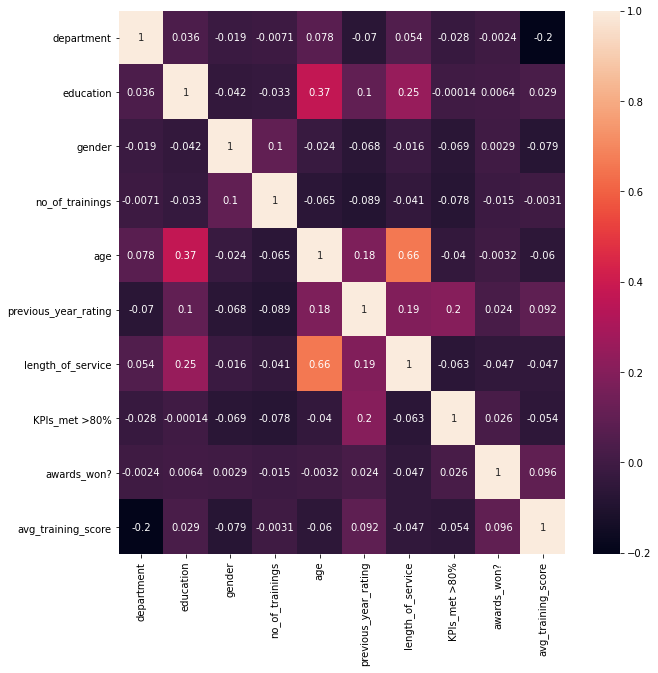

In [27]:
# Checking the correlation of the scaled features

plt.figure(figsize=(10,10))

sns.heatmap(x_scaled.corr(),annot=True)

In [28]:
!pip install xgboost

In [29]:
# Importing the classification models

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier


In [30]:
# XGBClassifier

xb=XGBClassifier(learning_rate =0.5, n_estimators=100, max_depth=3)


In [31]:
# fitting using the XGBClassifier

xb.fit(x_scaled,y_sample)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
# fitting using the Random Forest Classifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_scaled,y_sample)

RandomForestClassifier(n_estimators=1000)

In [33]:
# fitting using the GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=1000,max_depth= 4,min_samples_split= 5,learning_rate= 0.01)
gd.fit(x_scaled,y_sample)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_split=5,
                           n_estimators=1000)

### Test dataset is imported to test the model

In [34]:
# importing the testing data

test_data=pd.read_csv(r"C:\Users\hp\Downloads\test_2umaH9m.csv")
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [35]:
test_data.shape

(23490, 13)

In [36]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Inference
There are missing values in the test data.

In [37]:
# Filling the missing values
med=test_data['education'].mode()[0]

In [38]:
test_data['education'].fillna(med,inplace=True)

In [39]:
sub_data=test_data[test_data['previous_year_rating'].isnull()]
sub_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
21,5677,Technology,region_17,Bachelor's,m,sourcing,1,25,NaN,1,0,0,80
32,67672,Technology,region_17,Bachelor's,m,other,1,29,NaN,1,1,0,85
39,55325,Analytics,region_22,Bachelor's,m,other,1,25,NaN,1,0,0,88
47,44159,Analytics,region_22,Master's & above,m,other,1,31,NaN,1,1,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23406,53291,Operations,region_4,Bachelor's,m,sourcing,1,32,NaN,1,1,0,62
23436,10138,Technology,region_2,Bachelor's,f,referred,1,29,NaN,1,0,0,79
23445,65765,Analytics,region_31,Bachelor's,m,sourcing,3,28,NaN,1,0,0,86
23479,39410,Sales & Marketing,region_2,Bachelor's,m,other,3,20,NaN,1,0,0,49


In [40]:
sub_data['length_of_service'].value_counts()

1    1812
Name: length_of_service, dtype: int64

### Inference
In the test data also all those who have no previous year rating are those who have only 1 year of experience.

In [41]:
# Filling the missing value by 0

test_data['previous_year_rating'].fillna(0,inplace=True)

In [42]:
# to remove the unimportant features

test_new=test_data.drop(['employee_id','region','recruitment_channel'],axis=1)

In [43]:
test_new.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,0.0,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61


In [44]:
# Label Encoding

test_new['department']=label.fit_transform(test_new['department'])
test_new['education']=label.fit_transform(test_new['education'])
test_new['gender']=label.fit_transform(test_new['gender'])
test_new

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,0,1,1,24,0.0,1,1,0,77
1,2,0,0,1,31,3.0,5,0,0,51
2,7,0,1,1,31,1.0,4,0,0,47
3,5,0,0,3,31,2.0,9,0,0,65
4,1,0,1,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...
23485,3,1,1,1,24,3.0,1,0,0,61
23486,8,0,1,1,31,3.0,7,0,0,74
23487,2,0,0,1,26,4.0,4,0,0,50
23488,5,0,1,3,27,0.0,1,0,0,70


In [45]:
# Scaling the data

test_scaled=sc.transform(test_new)
test_scaled=pd.DataFrame(test_scaled,columns=test_new.columns)
test_scaled

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.218974,-0.638642,0.779350,-0.337537,-1.423003,-2.289756,-1.142661,1.072915,-0.160684,0.700870
1,-1.166613,-0.638642,-1.283121,-0.337537,-0.471860,-0.255693,-0.165483,-0.932040,-0.160684,-1.092547
2,0.821376,-0.638642,0.779350,-0.337537,-0.471860,-1.611735,-0.409778,-0.932040,-0.160684,-1.368458
3,0.026180,-0.638642,-1.283121,3.686983,-0.471860,-0.933714,0.811694,-0.932040,-0.160684,-0.126861
4,-1.564211,-0.638642,0.779350,-0.337537,-0.607738,0.422327,0.323105,-0.932040,-0.160684,-0.402771
...,...,...,...,...,...,...,...,...,...,...
23485,-0.769016,0.505228,0.779350,-0.337537,-1.423003,-0.255693,-1.142661,-0.932040,-0.160684,-0.402771
23486,1.218974,-0.638642,0.779350,-0.337537,-0.471860,-0.255693,0.323105,-0.932040,-0.160684,0.493938
23487,-1.166613,-0.638642,-1.283121,-0.337537,-1.151248,0.422327,-0.409778,-0.932040,-0.160684,-1.161525
23488,0.026180,-0.638642,0.779350,3.686983,-1.015370,-2.289756,-1.142661,-0.932040,-0.160684,0.218027


### Now the test data can be used to test the various models.

#### model testing using testing data

In [46]:
# Prediction using XGBClassifier

pred1=xb.predict(test_scaled)

In [47]:
# Prediction using Random Forest Classifier

pred2=rf.predict(test_scaled)

In [48]:
# Prediction using Gradient Booster Classifier

pred3=gd.predict(test_scaled)

#### Creating the dataframe of Employees ID in the test data and their promotion status found by using    XBGClassifier

In [49]:
df=pd.DataFrame()
df['employee_id']=test_data['employee_id']
df['is_promoted']=pred1

In [50]:
df

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [51]:
df.to_csv('Promotion_prediction_xb.csv')

#### Creating the dataframe of Employees ID in the test data and their promotion status found by using the random Forest Classifier

In [52]:
df=pd.DataFrame()
df['employee_id']=test_data['employee_id']
df['is_promoted']=pred2

In [53]:
df

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [54]:
df.to_csv('Promotion_prediction_rf.csv')

#### Creating the dataframe of Employees ID in the test data and their promotion status found by using the Gradient Booster Classifier

In [55]:
df=pd.DataFrame()
df['employee_id']=test_data['employee_id']
df['is_promoted']=pred3

In [56]:
df

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [57]:
df.to_csv('Promotion_prediction_gb.csv')

## Conclusion:
Analytics Vidhya Solution checker has found promotion prediction by Random Forest Classifier as the algorithm with highest F1 score of 0.424574209245742.